In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df=pd.read_csv('F://Perrin freres montly sales time series//data.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


# Data Cleaning

In [4]:
# Changing the column name
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.drop([105,106],axis=0,inplace=True)

In [6]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
# Convert month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [9]:
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


# EDA

In [10]:
round(df.describe(),3)

,Sales
count,105.000
mean,4761.152
std,2553.503
min,1413.000
25%,3113.000
50%,4217.000
75%,5221.000
max,13916.000


###### Perrin freres Monthly Sales  

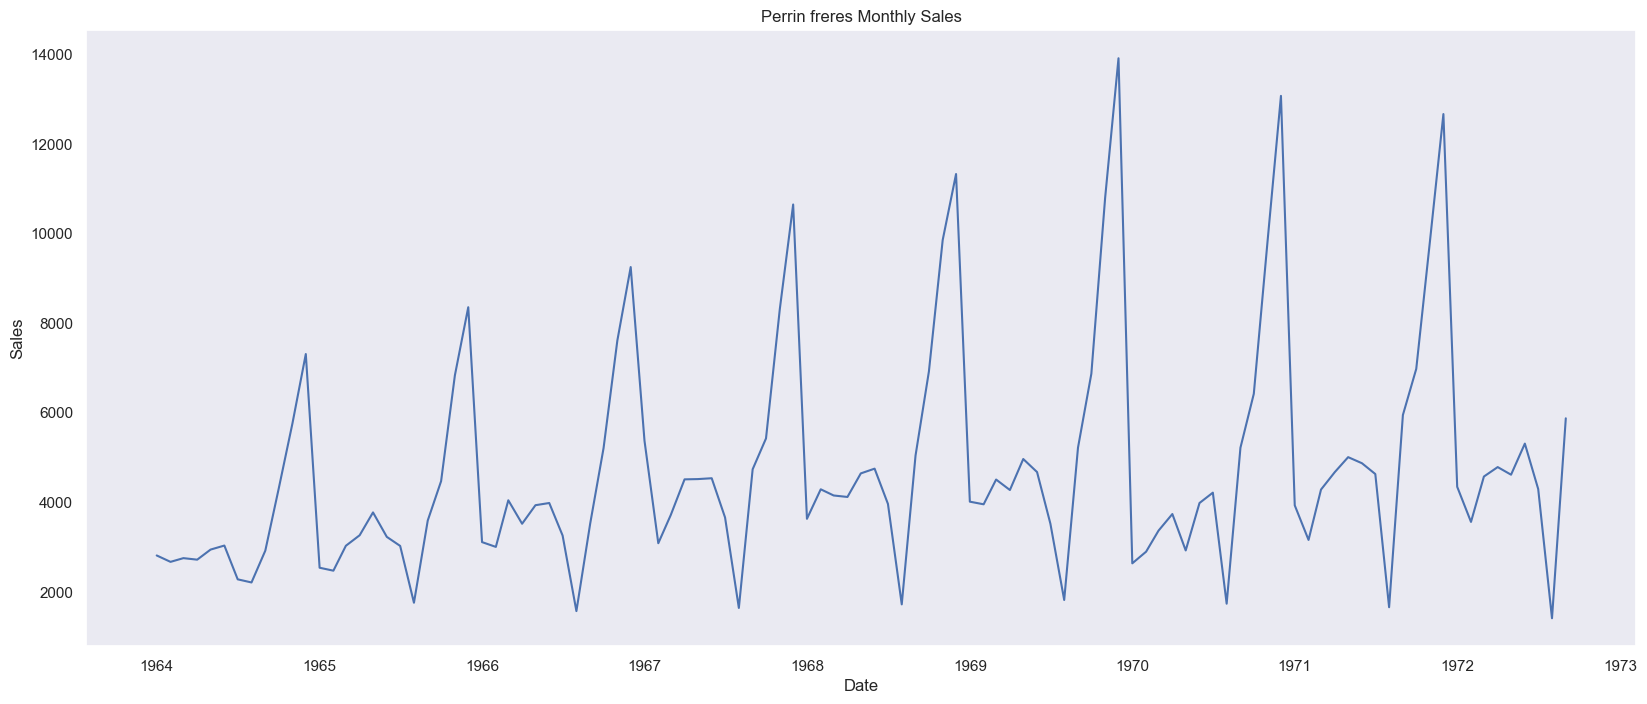

In [76]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.index,y="Sales",data=df)
plt.title(f'Perrin freres Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()

###### Perrin freres Monthly Sales

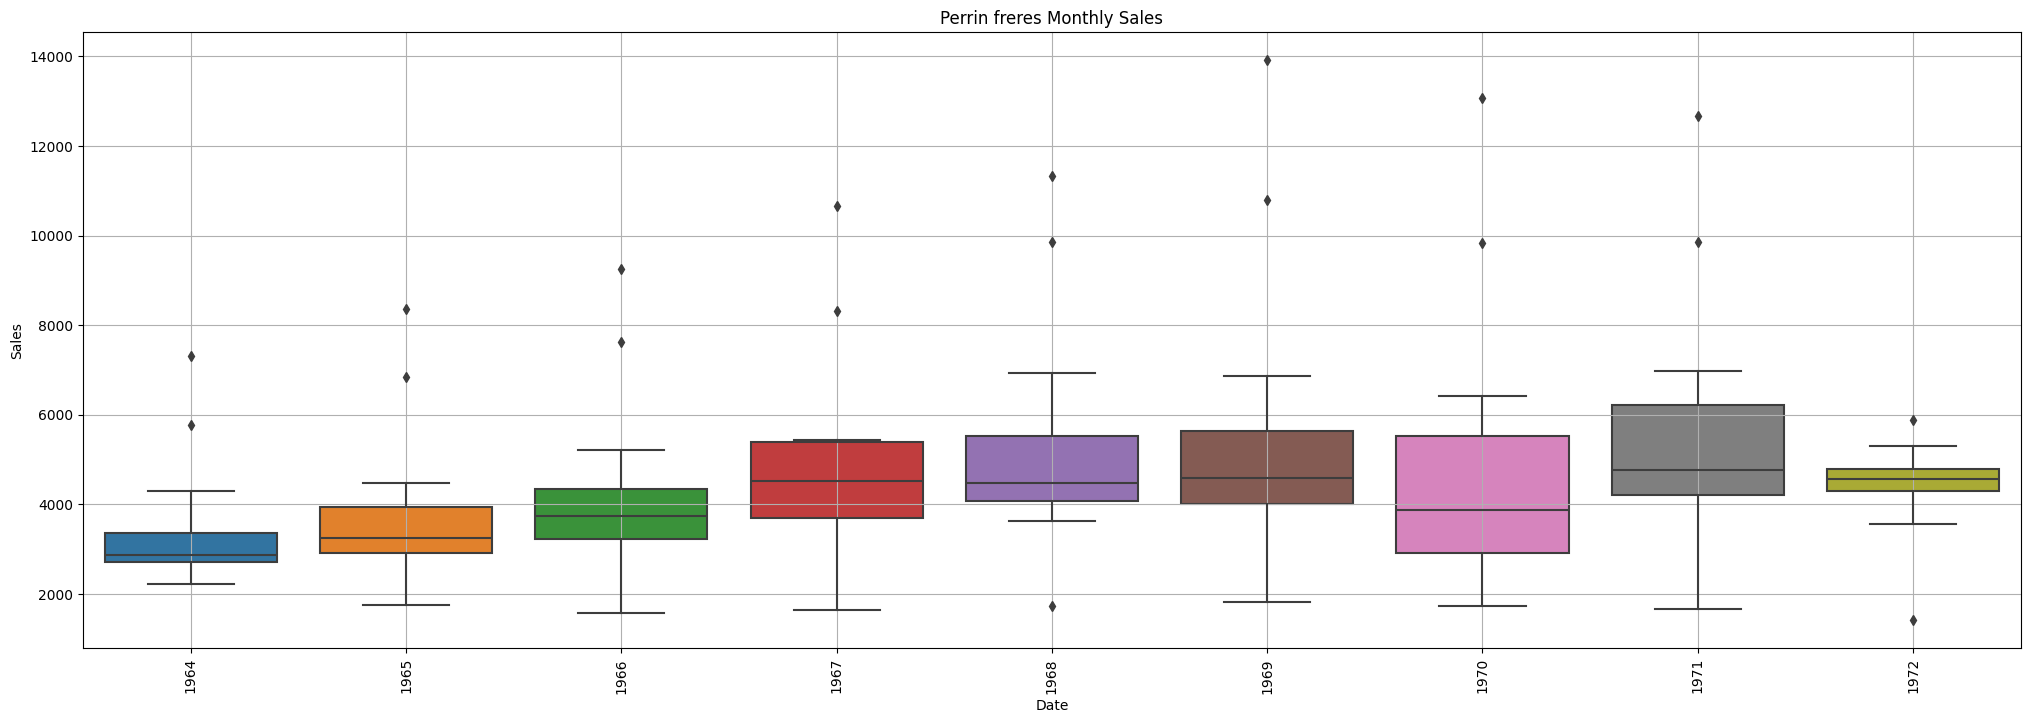

In [12]:
_, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title(f'Perrin freres Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid()


###### Perrin freres Monthly Sales¶

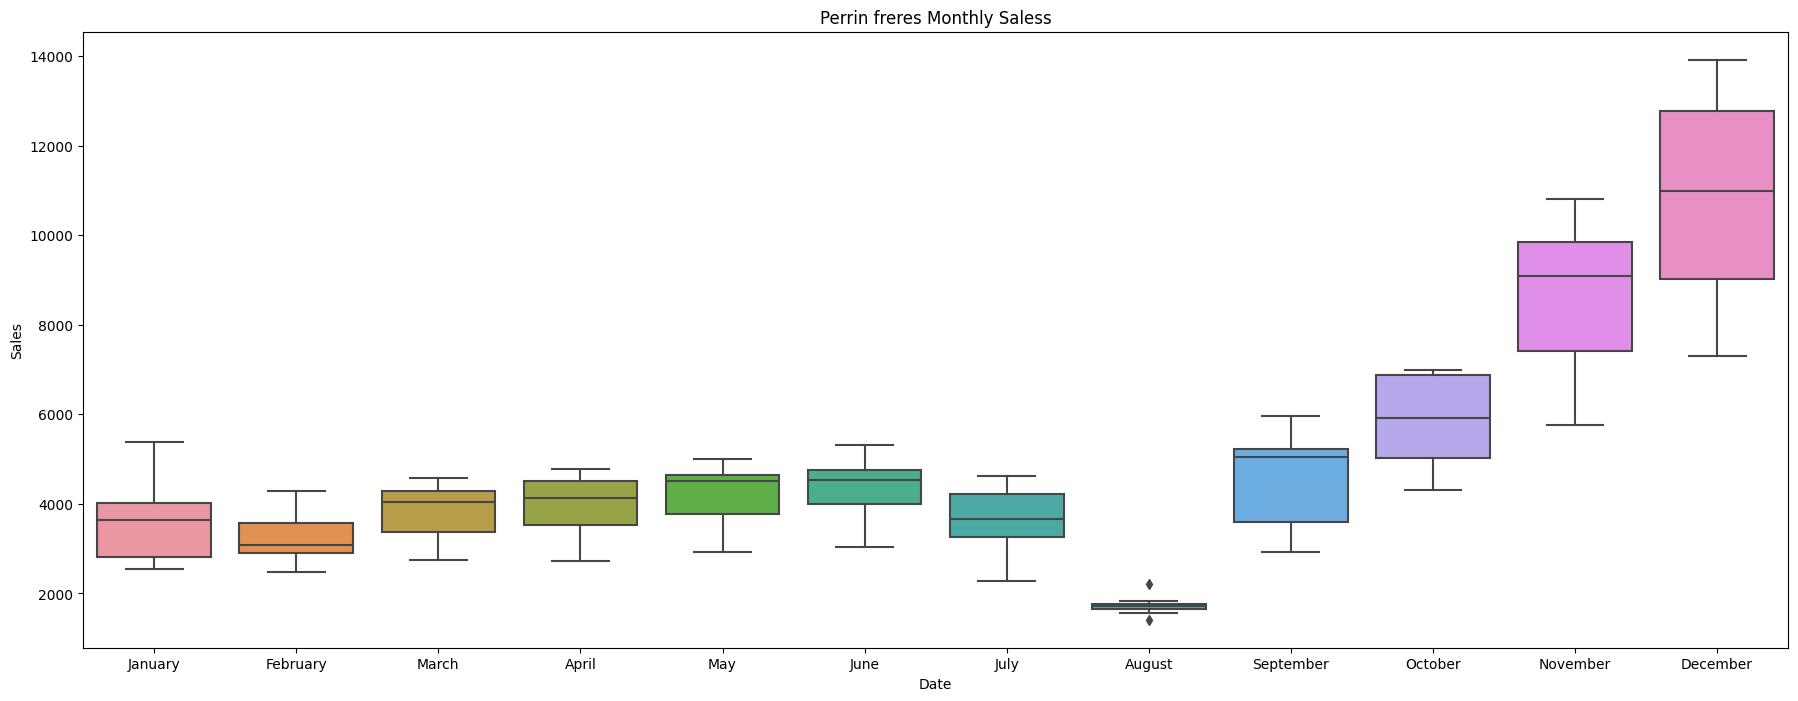

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y= df.values[:, 0],ax=ax)
plt.title(f'Perrin freres Monthly Saless')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

###### Perrin freres Monthly Average Sales  

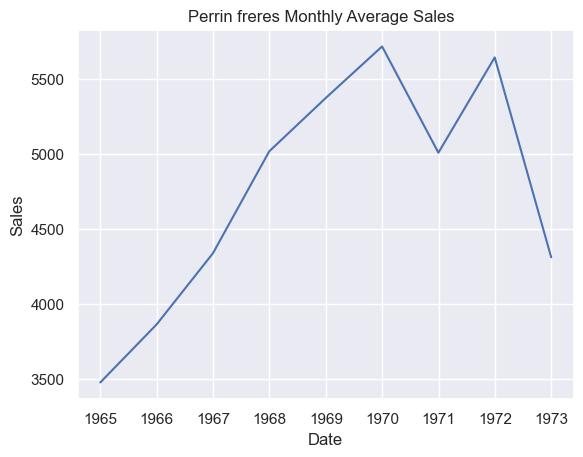

In [54]:
df_yearly_sum = df.resample('A').mean()
sns.lineplot(x=df_yearly_sum.index,y="Sales",data=df_yearly_sum)
plt.title(f"Perrin freres Monthly Average Sales  ")
plt.xlabel("Date")
plt.ylabel('Sales')
sns.set(style="darkgrid")
plt.show()

###### Perrin freres Monthly Average Quaterly Sales  

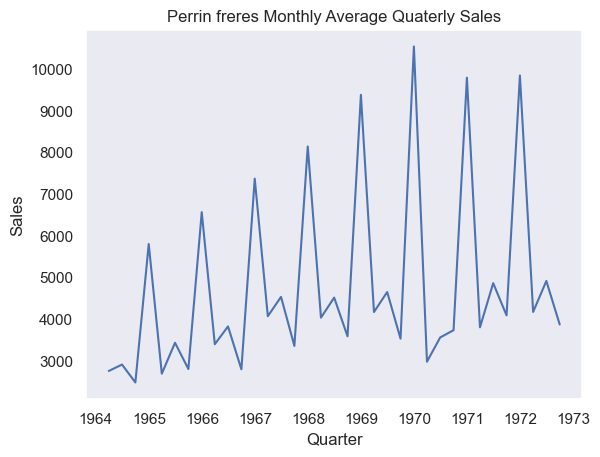

In [64]:
df_quaterly_sum2=df.resample('Q').mean()
sns.lineplot(x=df_quaterly_sum2.index,y="Sales",data=df_quaterly_sum2)
plt.title(f'Perrin freres Monthly Average Quaterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid()

######  Perrin freres Monthly Average  Sales Per 2 Years 

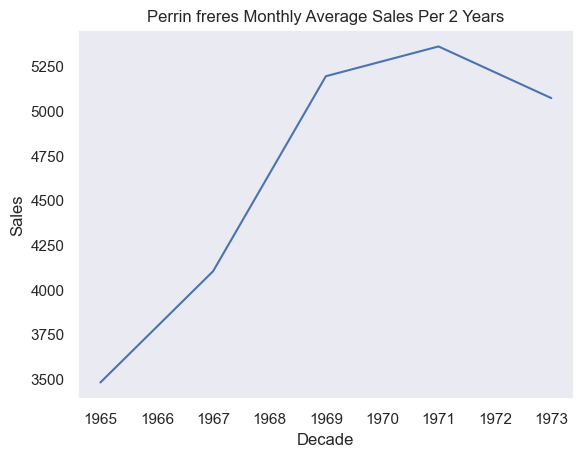

In [68]:
df_decade_sum=df.resample('2Y').mean()
sns.lineplot(x=df_decade_sum.index,y="Sales",data=df_decade_sum)
plt.title(f'Perrin freres Monthly Average Sales Per 2 Years')
plt.xlabel('Decade')
plt.ylabel('Sales')
plt.grid()

In [20]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Sales':'Mean'})
df_1= df_1.merge(df.groupby(df.index.year).std().rename(columns={'Sales':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct']=((df_1["Std"]/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
Month,,,
1964,3478.166667,1555.294759,44.72
1965,3864.166667,1900.883758,49.19
1966,4337.666667,2119.889119,48.87
1967,5016.000000,2380.616001,47.46
1968,5370.583333,2723.367082,50.71


###### Perrin freres Monthly Average Sales 

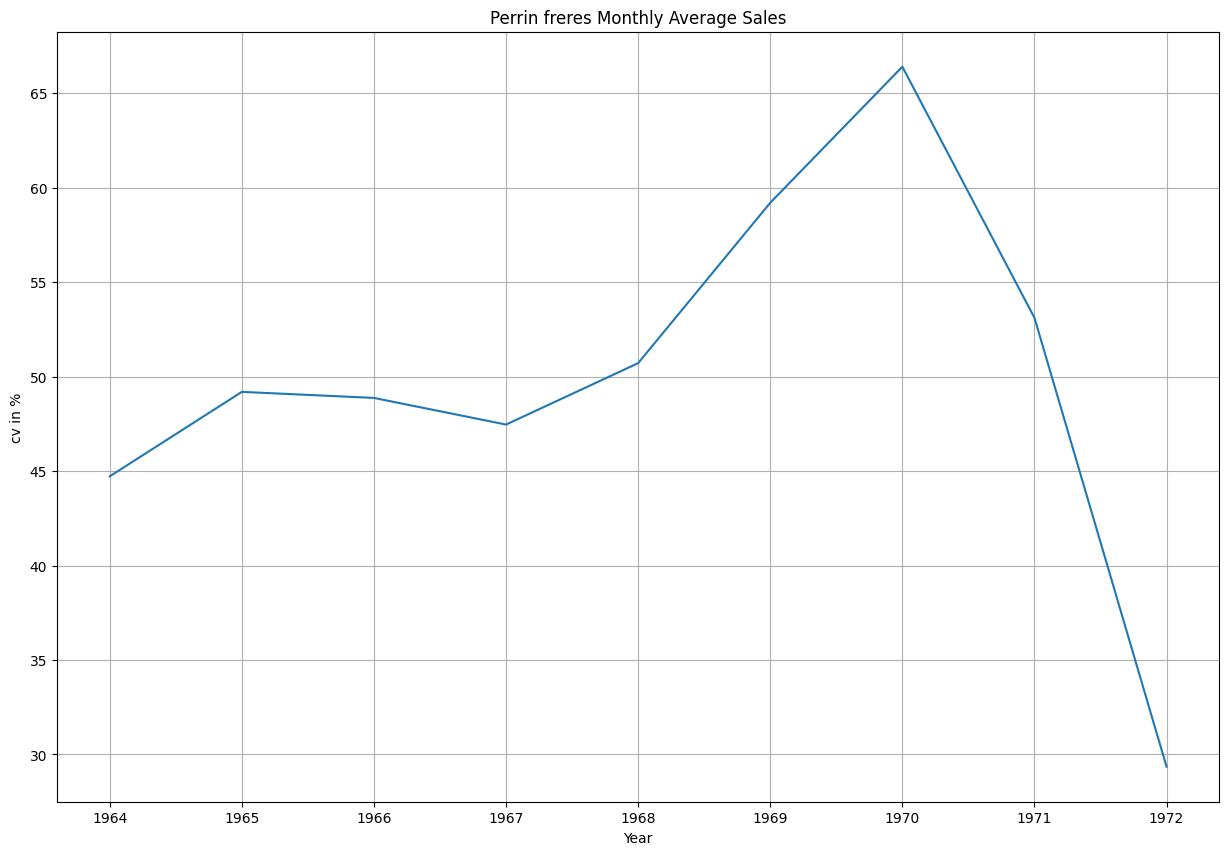

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title(f'Perrin freres Monthly Average Sales')
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()

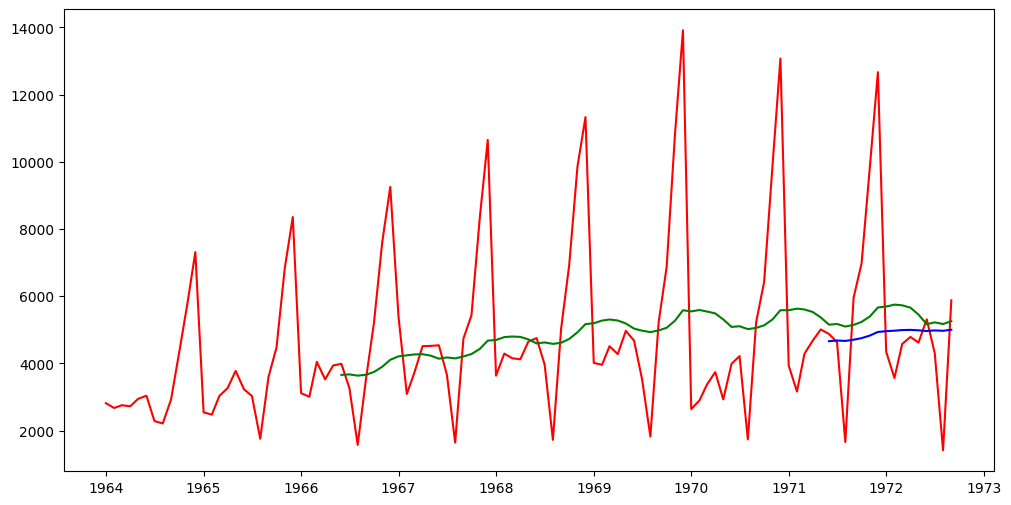

In [25]:

m30=df['Sales'].rolling(30).mean()
m60=df['Sales'].rolling(90).mean()
m90=df['Sales'].rolling(180).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Sales,'r')
plt.plot(m30,'g')
plt.plot(m60,'b')
plt.plot(m90,'w')

# Testing for data stationarity

#### Determining rolling statistics

In [80]:
df.shape

(105, 3)

In [79]:
rolstd

,Sales,Seasonal First Difference,forecast
Month,,,
1964-01-01,NaN,NaN,NaN
1964-02-01,NaN,NaN,NaN
1964-03-01,NaN,NaN,NaN
1964-04-01,NaN,NaN,NaN
1964-05-01,NaN,NaN,NaN
...,...,...,...
1972-05-01,2943.699327,408.824887,NaN
1972-06-01,2935.100773,362.515287,3221.676908
1972-07-01,2948.213094,387.260180,3213.593722


                  Sales  Seasonal First Difference     forecast
Month                                                          
1964-01-01          NaN                        NaN          NaN
1964-02-01          NaN                        NaN          NaN
1964-03-01          NaN                        NaN          NaN
1964-04-01          NaN                        NaN          NaN
1964-05-01          NaN                        NaN          NaN
...                 ...                        ...          ...
1972-05-01  5709.500000                 245.166667          NaN
1972-06-01  5746.000000                 207.666667  5704.137542
1972-07-01  5718.083333                 145.083333  5724.813506
1972-08-01  5697.583333                 131.166667  5739.951908
1972-09-01  5691.416667                  64.166667          NaN

[105 rows x 3 columns]                   Sales  Seasonal First Difference     forecast
Month                                                          
1964-01-01      

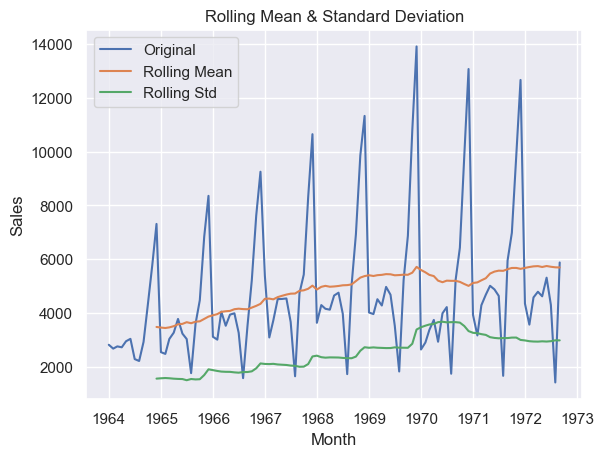

In [83]:

rolmean= df.rolling(window=12).mean()

rolstd= df.rolling(window=12).std()

print(rolmean,rolstd)
sns.lineplot(x=df.index,y="Sales",data=df,label='Original')
sns.lineplot(x=rolmean.index,y="Sales",data=rolmean,label='Rolling Mean')
sns.lineplot(x=rolstd.index,y="Sales",data=rolstd,label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

####  Dicky Fuller test

In [27]:


from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Sales'])

def adfuller_test(sales):
    result= adfuller(sales)
    labels=['ADF Test Statistic','p-value', '#Lags Used', 'Number of Observaations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1]<=0.05:
            print('Data is Stationary')
        else:
            print('Data is not stationary')
        
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
Data is not stationary
p-value : 0.3639157716602467
Data is not stationary
#Lags Used : 11
Data is not stationary
Number of Observaations Used : 93
Data is not stationary


# Making the data stationary

In [28]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [29]:
df.head(15)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [30]:
# again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())
'''
Here we can see that the p value is less than 0.05 so we can say that the data 
is stationary.
'''

ADF Test Statistic : -7.626619157213166
Data is Stationary
p-value : 2.0605796968136632e-11
Data is Stationary
#Lags Used : 0
Data is Stationary
Number of Observaations Used : 92
Data is Stationary


'\nHere we can see that the p value is less than 0.05 so we can say that the data \nis stationary.\n'

<Axes: xlabel='Month'>

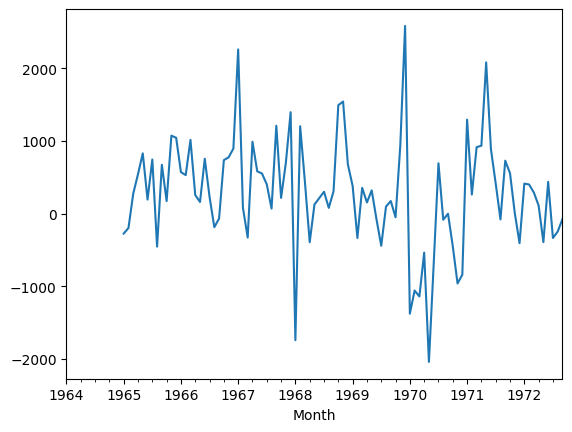

In [31]:
df['Seasonal First Difference'].plot()

                  Sales  Seasonal First Difference     forecast
Month                                                          
1964-01-01          NaN                        NaN          NaN
1964-02-01          NaN                        NaN          NaN
1964-03-01          NaN                        NaN          NaN
1964-04-01          NaN                        NaN          NaN
1964-05-01          NaN                        NaN          NaN
...                 ...                        ...          ...
1972-05-01  5709.500000                 245.166667          NaN
1972-06-01  5746.000000                 207.666667  5704.137542
1972-07-01  5718.083333                 145.083333  5724.813506
1972-08-01  5697.583333                 131.166667  5739.951908
1972-09-01  5691.416667                  64.166667          NaN

[105 rows x 3 columns]                   Sales  Seasonal First Difference     forecast
Month                                                          
1964-01-01      

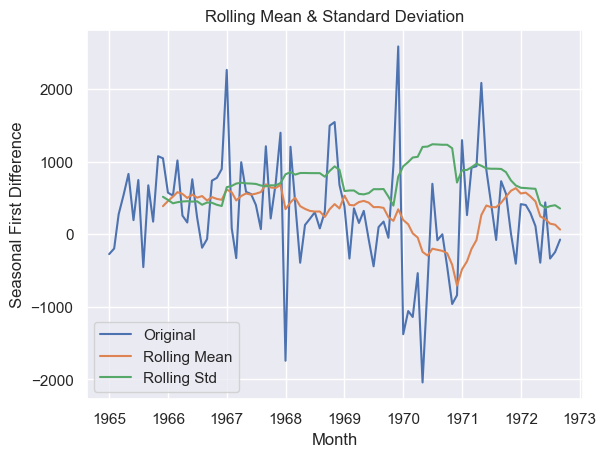

In [85]:

rolmean= df.rolling(window=12).mean()

rolstd= df.rolling(window=12).std()

print(rolmean,rolstd)
sns.lineplot(x=df.index,y="Seasonal First Difference",data=df,label='Original')
sns.lineplot(x=rolmean.index,y="Seasonal First Difference",data=rolmean,label='Rolling Mean')
sns.lineplot(x=rolstd.index,y="Seasonal First Difference",data=rolstd,label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Selecting p,i q value for arima model

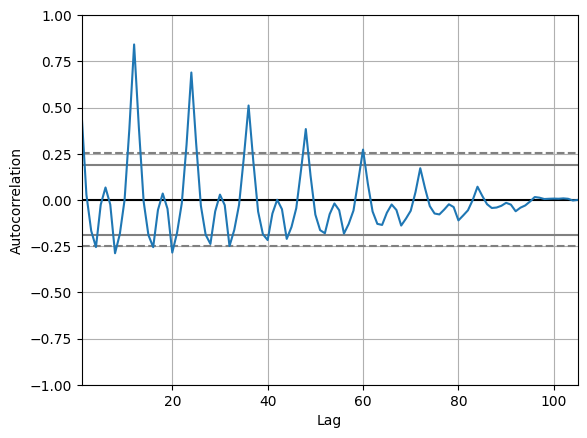

In [32]:
pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

##### Final Thoughts on Autocorrelation and Partial Autocorrelation

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


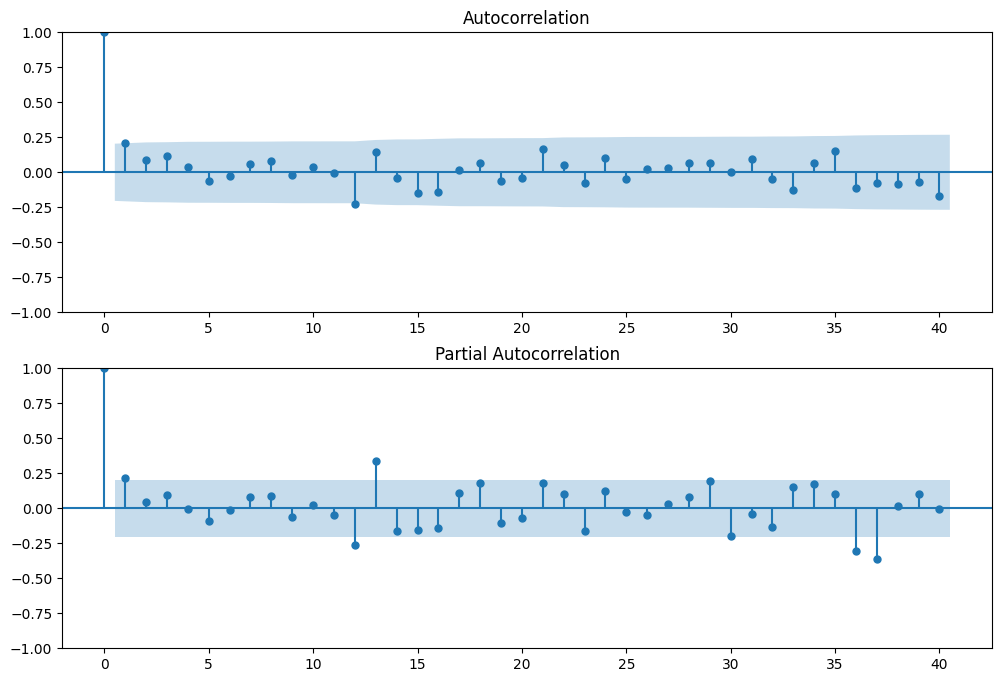

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)
#Here iloc[13:] used because first 12 values are nan.
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)



In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create the ARIMA model with p=1, d=1, q=1
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 12 Dec 2023   AIC                           1911.627
Time:                        11:00:17   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.0

<Axes: xlabel='Month'>

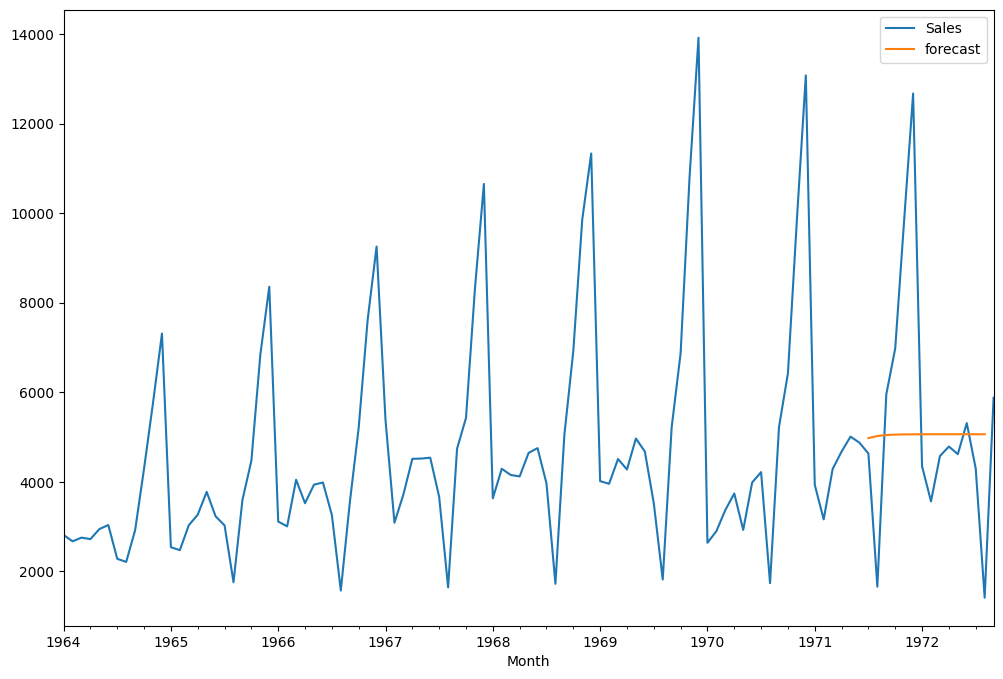

In [35]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [36]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
#Here order values will value of p,d,q 
'''
seasonal_order first three values are p,d,q and last value is the shifting 
values. To make the data stationary we shift our data by 12. So 12 will be 
the last value of seasonal_order is 12 in this case 
'''
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

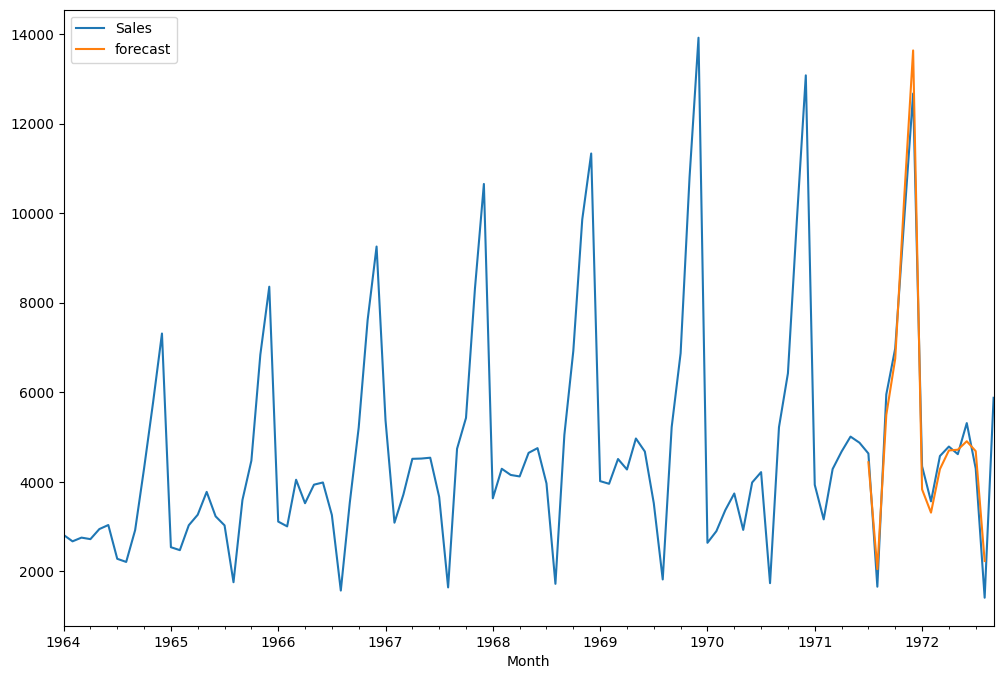

In [37]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
'''
Here start means the index from where you want to start predict and
end means the index where you want to stop the prediction. Suppose we have
105 data. So the index number is 0-104. Now you want to  predict data from 
from 90 to 103 and plot it in the graph to see the difference between actual and 
predicted value. To do that here start parameter value will 90 to 103.
'''
df[['Sales','forecast']].plot(figsize=(12,8))

In [38]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
'''
Here 24 means I want to predict future 24 months value from the last 
value of the data.
'''
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


<Axes: >

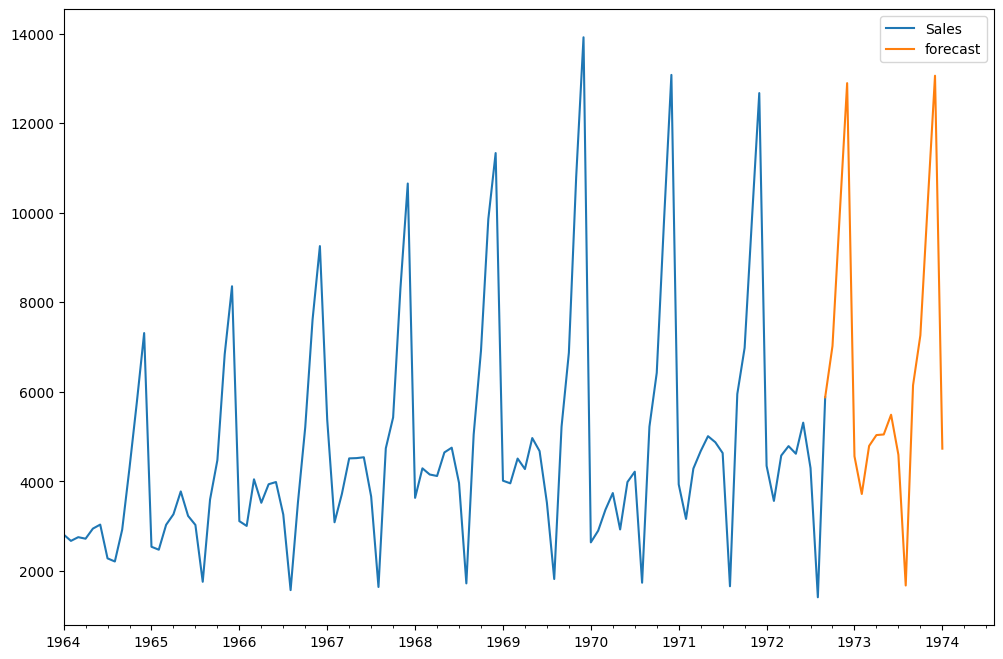

In [39]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
'''
Suppose we have data from 1 to 105 so the first index is 0 and the last index 
is 104.Now you want to predict data future 16 dates data following the last time,
Then we will write the last index of the data in the start parameter which is 
104 and in the end parameter we will write how many data we want to predict. Here
we want to predict 16 data so we wrote 120.
'''
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 